## Import

In [1]:
from ipywidgets import *
from cycler import cycler
from sklearn.decomposition import PCA

import numpy as np
import nibabel as nib
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

np.set_printoptions(suppress=True)

mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.bottom'] = False
mpl.rcParams['axes.spines.left'] = True

def cos_sim(A, B):
    return np.dot(A, B)/(np.linalg.norm(A)*np.linalg.norm(B))

In [ ]:
brain_mask = nib.load('./results/MNI152NLin2009cAsym_3mm_mask.nii.gz').get_fdata()
mask = nib.load('./results/BNA_3mm_atlas.nii.gz').get_fdata()

## Spatial gradients of hippocampal subspaces or canonical space (Fig. 5A, 6A, 7A)

In [ ]:
beta_true_novelty = np.load('./results/beta_true_novelty.npy')
beta_true_memory = np.load('./results/beta_true_memory.npy')
beta_true_recall = np.load('./results/beta_true_recall_start.npy')
hipp_canonical_component = np.load('./results/hipp_canonical_component.npy')

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

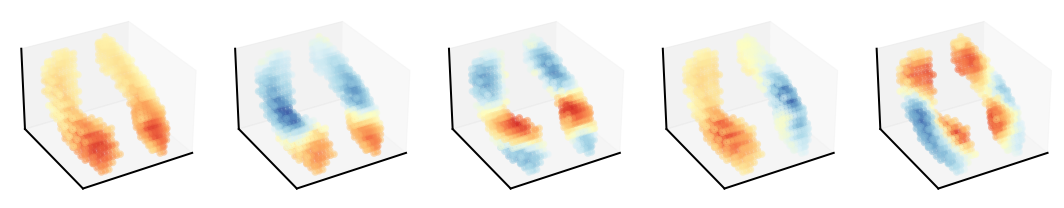

In [6]:
which_cog = 'canonical' # co-occur / valence / memory / recall / canonical

num_pcs = 5

if which_cog == 'co-occur':
    pca_1 = PCA(n_components=12)
    data_1 = np.mean(beta_true_novelty[0], axis=0)[:,0]
    pca_1.fit(data_1)
    direction = [-1,1,1,1,1]
    pc_components = pca_1.components_
elif which_cog == 'valence':
    pca_1 = PCA(n_components=12)
    data_1 = np.mean(beta_true_novelty[0], axis=0)[:,1]
    pca_1.fit(data_1)
    direction = [-1,-1,1,1,1]
    pc_components = pca_1.components_
elif which_cog == 'memory':
    pca_1 = PCA(n_components=12)
    data_1 = np.mean(beta_true_memory[0], axis=0)[:,0]
    pca_1.fit(data_1)
    direction = [1,-1,1,1,1]
    pc_components = pca_1.components_
elif which_cog == 'recall':
    pca_1 = PCA(n_components=12)
    data_1 = np.mean(beta_true_recall[0], axis=0)[:,0]
    pca_1.fit(data_1)
    direction = [1,-1,1,1,1]
    pc_components = pca_1.components_

if which_cog == 'canonical':
    pc_components = hipp_canonical_component
    direction = [-1,1,1,1,1]

fig = plt.figure(figsize=(num_pcs*3, 3))
for i in range(num_pcs):
    x = np.hstack([np.where(mask == r)[0] for r in [215,216,217,218]])
    y = np.hstack([np.where(mask == r)[1] for r in [215,216,217,218]])
    z = np.hstack([np.where(mask == r)[2] for r in [215,216,217,218]])

    xyz = np.vstack([x,y,z])
    density =  pc_components[i] * direction[i]

    idx = density.argsort()
    x, y, z, density = x[idx], y[idx], z[idx], density[idx]

    axs = fig.add_subplot(1,num_pcs,i+1, projection='3d')
    axs.scatter(x, y, z, c=density, cmap = "RdYlBu_r", alpha = 0.5, marker = "o", linewidth = 3, vmin = -0.1, vmax = 0.1)

    axs.grid(False)
    axs.set_xticks([])
    axs.set_yticks([])
    axs.set_zticks([])
    axs.view_init(30, 60)

fig.tight_layout()
plt.imshow

# fig.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/PC_gradients_canonical.png',dpi=300, bbox_inches = "tight")

## Neural trajectory (Fig. 4A)

In [ ]:
novelty_co_space_trajectory = np.load('./results/novelty_co_space_novelty_true_tempsm.npy')
novelty_val_space_trajectory = np.load('./results/novelty_val_space_novelty_true_tempsm.npy')

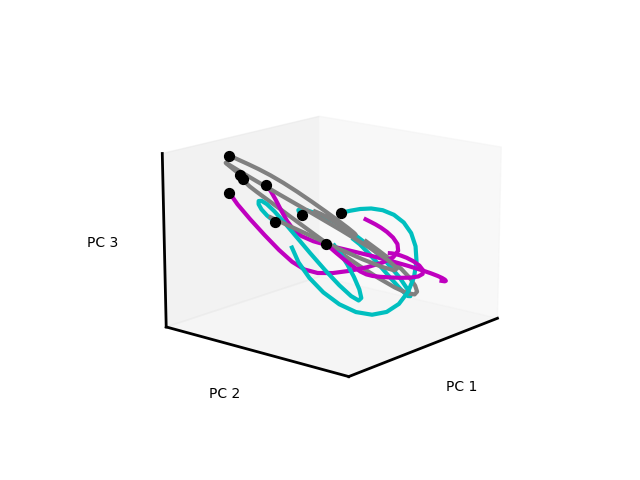

In [9]:
%matplotlib widget

fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')

colormap = plt.cm.gist_ncar_r

## co-occurrence novelty
# plot_data = novelty_co_space_trajectory[0]
# custom_cycler = (cycler(color=['b','b','b','grey','grey','grey','r','r','r']))
# direction = np.array([1,-1,1])

## valence novelty
plot_data = novelty_val_space_trajectory[0]
custom_cycler = (cycler(color=['c','grey','m','c','grey','m','c','grey','m']))
direction = np.array([-1,-1,1])

fig.gca().set_prop_cycle(custom_cycler)

lim = 1
timepoint = 0


for cond in range(9):   
    p3d = ax3D.plot(plot_data[cond][0,timepoint:]*direction[0], 
                    plot_data[cond][1,timepoint:]*direction[1], 
                    plot_data[cond][2,timepoint:]*direction[2], linewidth = 3)    
    ax3D.scatter(plot_data[cond][0][timepoint]*direction[0],
                 plot_data[cond][1][timepoint]*direction[1], 
                 plot_data[cond][2][timepoint]*direction[2], s = 50, color = 'k')
    
    # ax3D.scatter(plot_data[cond][0][1:]*direction[0],
    #              plot_data[cond][1][1:]*direction[1], 
    #              plot_data[cond][2][1:]*direction[2], s = 25)
    
ax3D.grid(False)
ax3D.set_facecolor('white')
ax3D.set_xticks([])
ax3D.set_yticks([])
ax3D.set_zticks([])
ax3D.set_xlabel('PC 1')
ax3D.set_ylabel('PC 2')
ax3D.set_zlabel('PC 3')
ax3D.view_init(15, 40)
# fig.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/Valence_space_valence_trajectory.png', dpi=300, bbox_inches = "tight")